# Human Health and the Gut Micribiome

The human microbiome constitutes the entire set of microbial organisms associated with the human host. This dataset fcuses on the microbiomes of the human gut. The symbiosis of the organisms in the gut and its human host is extremely complex and yet to be fully understood. Sudying this relationship may lead to profound understanding of how these organisms may or may not affect human health. Gut microbes perform chemical reactions and produce various compounds, such reactions and production may have major affects on the health of the human host. 

The goal of this project is to find the most "intersting" datapoints in the dataset created by the team of Edoardo Pasolli, Duy Tin Truong, Faizan Malik, Levi Waldron, and Nicola Segata - whom have affiliations with the University of Tento and City University of New York - through PCA and then further find insights of the data through clustering. The ultimate goal is to build a predictor that can predict what disease the host may have or if they are healthy. 

The choice to preprocess the data with PCA is due to the method of shotgun genomics implemented to acquire the data. This is the method of extracting all genomic presence, resulting in extremely complex and high-dimensional data. We will see thousands of columns per host representing various microbial organisms. 

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pwd

'/Users/sethmartin/Downloads'

In [3]:
cd /Users/sethmartin/Downloads/metagenomics-data

/Users/sethmartin/Downloads/metagenomics-data


In [4]:
def  file_to_df(file):
    '''
    this function formats the data appropriately for our EDA and PCA and Clustering later. 
    '''

    df = pd.read_csv(file,sep="\t",dtype=object,header=None).T

    header = df.iloc[0] 
    df = df[1:] 
    df.columns = header 

    return(df)

In [5]:
meta_df = file_to_df("abundance.txt")

In [6]:
meta_df.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
2,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
3,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
4,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
5,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


### comment on ^^^
As you can see we 3,513 columns. In order to efficiently and effectively find insights, we will later perform PCA. 

In [7]:
meta_df.shape

(3610, 3513)

In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610 entries, 1 to 3610
Columns: 3513 entries, dataset_name to k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
dtypes: object(3513)
memory usage: 96.8+ MB


In [9]:
# getting names and counts of all diseases labeled in the data

unique_diseases = meta_df["disease"].unique()

disease_counts = {}

for disease in unique_diseases:
    count = meta_df["disease"].value_counts()[disease]
    disease_counts[disease] = count

for disease, count in disease_counts.items():
    print(f"{disease}: {count}")

n: 2054
obesity: 164
leaness: 89
nd: 475
stec2-positive: 52
 -: 20
ibd_ulcerative_colitis: 148
ibd_crohn_disease: 25
n_relative: 47
y: 36
cirrhosis: 118
obese: 5
overweight: 10
-: 7
underweight: 1
t2d: 223
impaired_glucose_tolerance: 49
cancer: 48
small_adenoma: 26
large_adenoma: 13


### comment on ^^^

In total we have 13 diseases/conditions labeled for the various human hosts in the dataset. The data has some class imbalance, with some diseases/conditions having much 
more presence in the dataset. However, we will attempt to create an effective model despite this. 

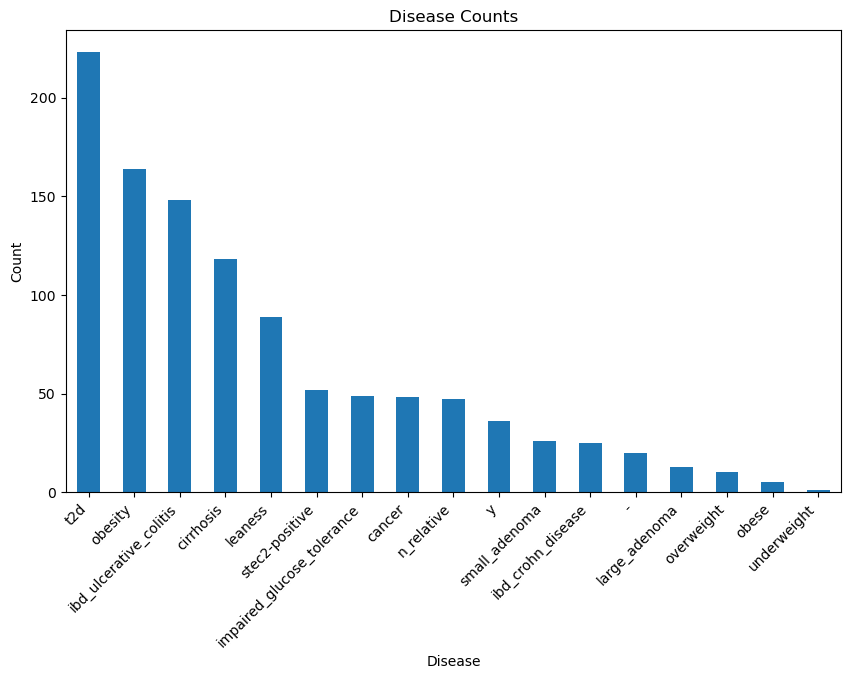

In [10]:
# plotting value counts of diseases

disease_counts = meta_df['disease'].value_counts().drop(['-', 'n', 'nd']).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar')
plt.title('Disease Counts')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### comment on ^^^
The counts indicate that obesity is highly present in the data, as well as type 2 diabetes. Considering the data, I am mainly interested in two things, if the gut metagenome can be used to predict certain conditions, such as obesity, and if diseases such as cancer, which have less of a presence in the classes of diseases, have a unique enough gut metagenome to 
allow for accurate predictions. As you may noticed, some classes such as "y" do not give a clear indication as to what condition or disease that is, but in case this is representative of 
an important condition recognized by the original researchers, we will not drop the data associated with unclear labels. Before continuing, I will also clean up the data by combining the reduntant labels "obesity" and "obese"

In [11]:
meta_df['disease'].replace('obese', 'obesity', inplace=True)

In [12]:
unique_diseases = meta_df["disease"].unique()

disease_counts = {}

for disease in unique_diseases:
    count = meta_df["disease"].value_counts()[disease]
    disease_counts[disease] = count

for disease, count in disease_counts.items():
    print(f"{disease}: {count}")

n: 2054
obesity: 169
leaness: 89
nd: 475
stec2-positive: 52
 -: 20
ibd_ulcerative_colitis: 148
ibd_crohn_disease: 25
n_relative: 47
y: 36
cirrhosis: 118
overweight: 10
-: 7
underweight: 1
t2d: 223
impaired_glucose_tolerance: 49
cancer: 48
small_adenoma: 26
large_adenoma: 13


^^^ Just checking to make sure the "obesity" and "obese" were properly consolidated.

In [13]:
print(meta_df['age'].dtype)
print(meta_df['disease'].dtype)


object
object


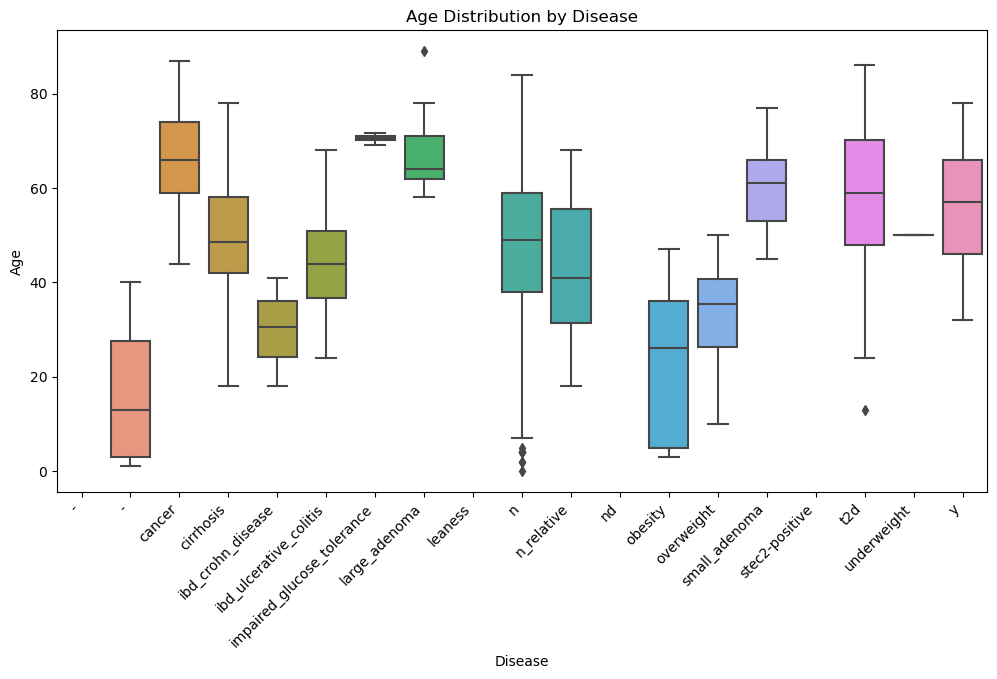

In [14]:
# Convert 'age' column to numeric
meta_df['age'] = pd.to_numeric(meta_df['age'], errors='coerce')

# Convert 'disease' column to categorical
meta_df['disease'] = meta_df['disease'].astype('category')

# age distribution by disease (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='disease', y='age', data=meta_df)
plt.title('Age Distribution by Disease')
plt.xlabel('Disease')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

### comment on ^^^
Age seems to play a significant factor in many cases: however, for the model, I would like it to be independent of age to see if we can solely predict based off of gut metagenomes. 

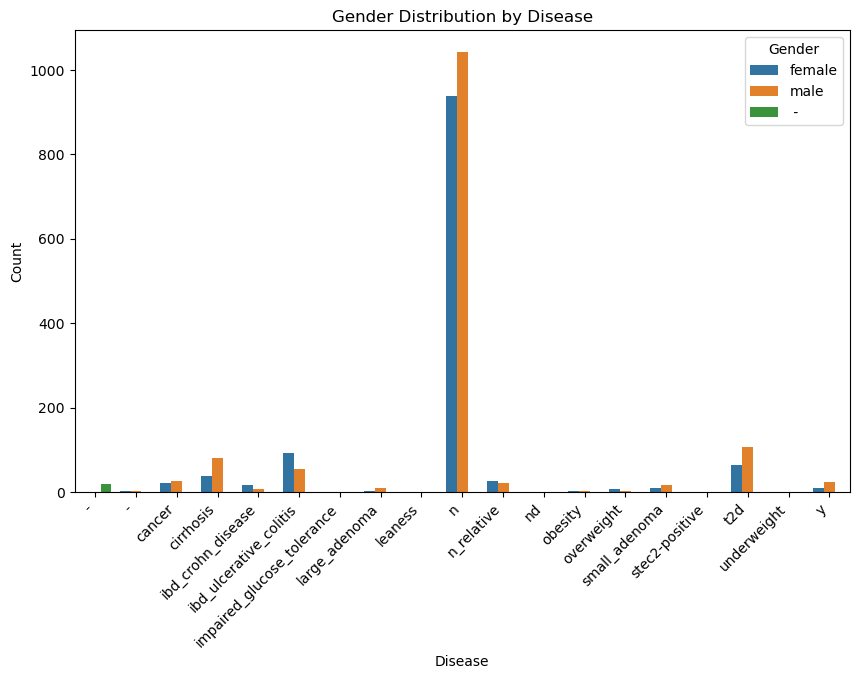

In [15]:
cleaned_meta_df = meta_df[~meta_df['disease'].isin(['n', 'nd'])]
cleaned_meta_df = meta_df[~meta_df['gender'].isin(['-', 'nd', 'na'])]

plt.figure(figsize=(10, 6))
sns.countplot(x='disease', hue='gender', data=cleaned_meta_df)
plt.title('Gender Distribution by Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

^^^ a lot of data seems to lack gender, but for data wheregender data is present, there seems to be a clear inbalance of diseases effecting certain genders. For example, 
cirrhosis is much more present in the male population based on this data. 

In [16]:
cleaned_meta_df = meta_df[~meta_df['disease'].isin(['n', 'nd']) & ~meta_df['gender'].isin(['-', 'nd', 'na'])]

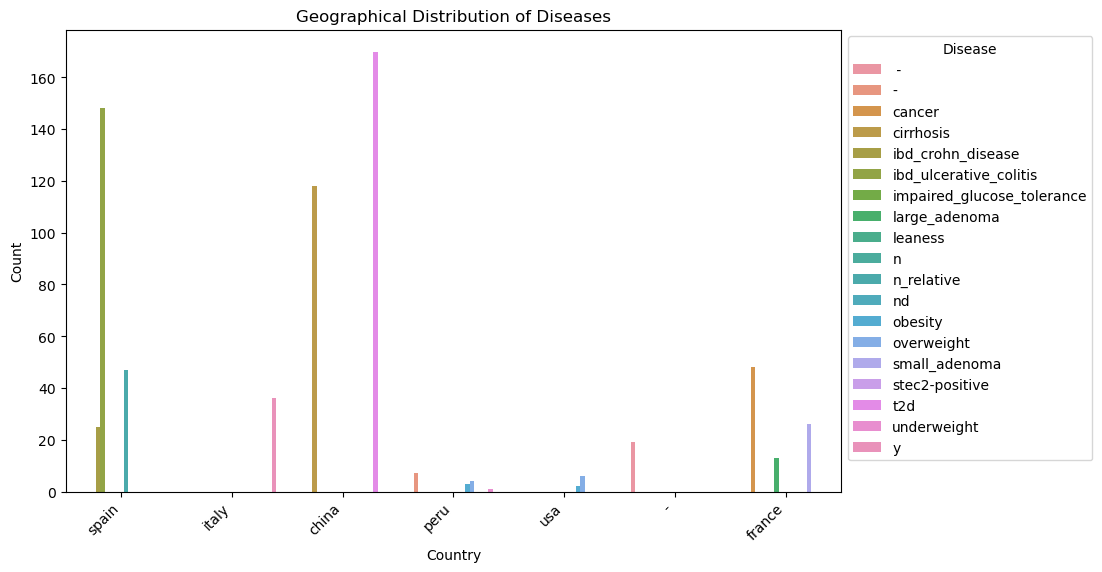

In [17]:
# geographical distribution of diseases
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='disease', data=cleaned_meta_df)
plt.title('Geographical Distribution of Diseases')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disease', bbox_to_anchor=(1, 1))
plt.show()

### Removing Unwanted Data
For the purpose of this project. I am only interested in the metagenome data and disease data. I will be removing all other columns. 

In [18]:
main_meta_df =  cleaned_meta_df = meta_df[['disease'] + list(meta_df.columns[211:])]

main_meta_df.head()

,disease,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
1,n,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0,...,0,0,0,0,0,0,0,0,0,0
2,n,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0,...,0,0,0,0,0,0,0,0,0,0
3,n,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0,...,0,0,0,0,0,0,0,0,0,0
4,n,0.40133,0.40133,0.40133,0.40133,0.40133,0.35994,0.35994,0.35994,0,...,0,0,0,0,0,0,0,0,0,0
5,n,0.17479,0.17479,0.17479,0.17479,0.17479,0.16331,0.1528,0.1528,0.01051,...,0,0,0,0,0,0,0,0,0,0


In [19]:
column_data_types = main_meta_df.dtypes
print(column_data_types)

0
disease                                                                                                                                             category
k__Archaea                                                                                                                                            object
k__Archaea|p__Euryarchaeota                                                                                                                           object
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                        object
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                  object
                                                                                                                                                      ...   
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales

^^^ we need to convert all our data into readable numbers. 

In [20]:
# One-hot encode 'disease' column
disease_encoded = pd.get_dummies(main_meta_df['disease'], prefix='disease')
meta_df_encoded = pd.concat([main_meta_df, disease_encoded], axis=1)
meta_df_encoded.drop('disease', axis=1, inplace=True)

# Convert object columns to integer
object_columns = meta_df_encoded.select_dtypes(include=['object']).columns
meta_df_encoded[object_columns] = meta_df_encoded[object_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
meta_df_encoded[object_columns] = meta_df_encoded[object_columns].astype(int)

In [21]:
column_data_types = meta_df_encoded.dtypes
print(column_data_types)

k__Archaea                                                                                     int64
k__Archaea|p__Euryarchaeota                                                                    int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                 int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                           int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae    int64
                                                                                               ...  
disease_small_adenoma                                                                           bool
disease_stec2-positive                                                                          bool
disease_t2d                                                                                     bool
disease_underweight                                                                        

In [23]:
last_20_columns = meta_df_encoded.columns[-20:]
print(last_20_columns)

Index(['k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965',
       'disease_ -', 'disease_-', 'disease_cancer', 'disease_cirrhosis',
       'disease_ibd_crohn_disease', 'disease_ibd_ulcerative_colitis',
       'disease_impaired_glucose_tolerance', 'disease_large_adenoma',
       'disease_leaness', 'disease_n', 'disease_n_relative', 'disease_nd',
       'disease_obesity', 'disease_overweight', 'disease_small_adenoma',
       'disease_stec2-positive', 'disease_t2d', 'disease_underweight',
       'disease_y'],
      dtype='object')


In [24]:
# creating a separate dataframe without the target data
genome_df = main_meta_df.drop('disease', axis=1)

In [25]:
object_columns2 = genome_df.select_dtypes(include=['object']).columns
genome_df[object_columns2] = genome_df[object_columns2].apply(pd.to_numeric, errors='coerce').fillna(0)
genome_df[object_columns2] = genome_df[object_columns2].astype(int)

In [26]:
column_data_types2 = genome_df.dtypes
print(column_data_types2)

0
k__Archaea                                                                                                                                          int64
k__Archaea|p__Euryarchaeota                                                                                                                         int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                      int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                int64
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae                                                         int64
                                                                                                                                                    ...  
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae

### Performing PCA

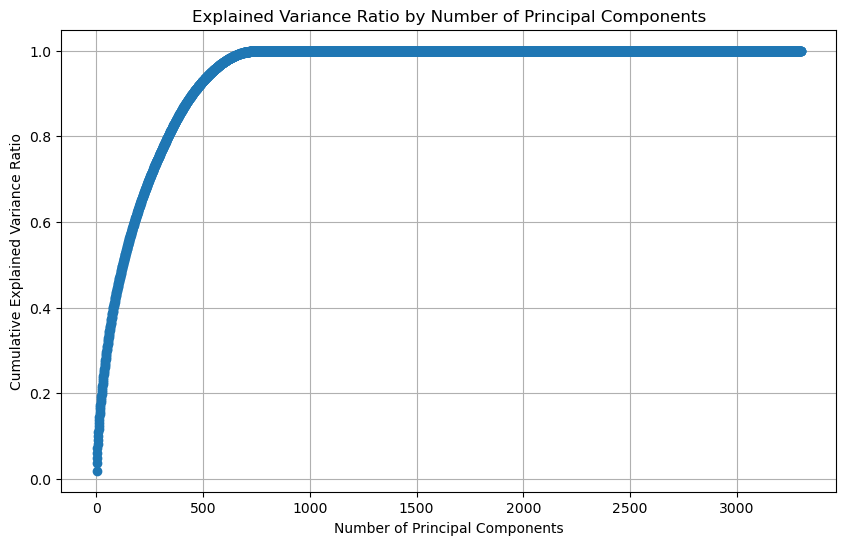

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
genome_scaled = scaler.fit_transform(genome_df)

pca = PCA()
pca.fit(genome_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [28]:
component_index = 500

variance_ratio_at_500 = cumulative_explained_variance[component_index - 1]

print("Explained Variance Ratio at 500 Principal Components:", variance_ratio_at_500)


Explained Variance Ratio at 500 Principal Components: 0.9297852446242598


### Analysis
For our model, considering it's complexity and vast amount of features originally, we will use 500 components, which explains about 93% of the infomration in the data. This is significantly less than the original number of features. 

### Performing Clustering

In [33]:
from sklearn.cluster import KMeans

num_components = 500  
pca1 = PCA(n_components=num_components)
genome_pca1 = pca1.fit_transform(genome_scaled)

kmeans1 = KMeans()

kmeans1.fit(genome_pca1)

cluster_labels1 = kmeans1.labels_

print(cluster_labels1)

/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 3 3 ... 3 3 3]


In [34]:
print("Total number of clusters:", kmeans1.n_clusters)

Total number of clusters: 8


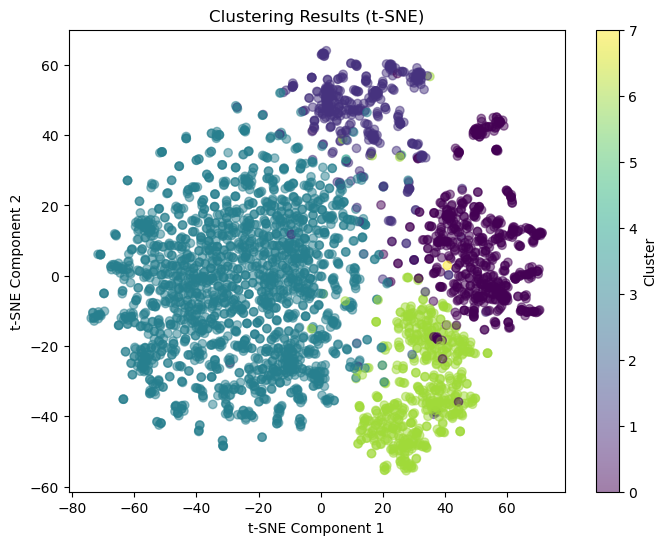

In [35]:
from sklearn.manifold import TSNE

tsne1 = TSNE(n_components=2)
genome_tsne1 = tsne1.fit_transform(genome_pca1)

# Plot clusters in 2D space using t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(genome_tsne1[:, 0], genome_tsne1[:, 1], c=cluster_labels1, cmap='viridis', alpha=0.5)
plt.title('Clustering Results (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

^^^ without defining the amount of desired clusters, we got 8 in total. We know of 19 labeled diseases and conditions so we will define the number of clusters as 19. 

In [37]:
num_clusters = 19
kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(genome_pca1)

cluster_labels = kmeans.labels_

/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
print("Total number of clusters:", kmeans.n_clusters)

Total number of clusters: 19


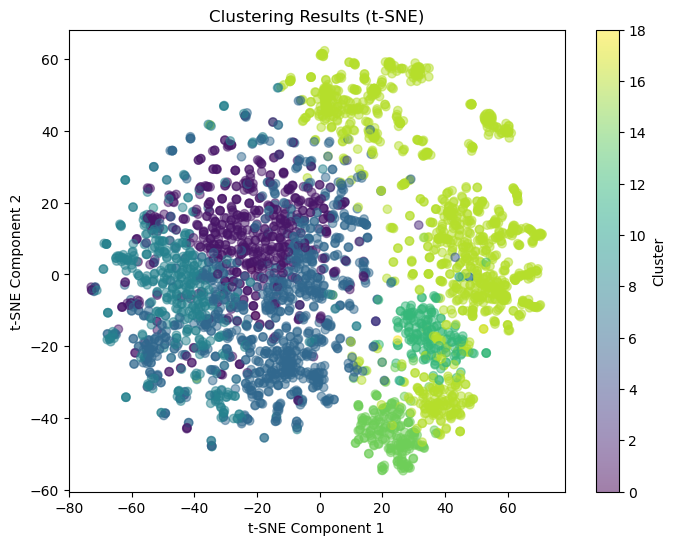

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
genome_tsne = tsne.fit_transform(genome_pca1)

# Plot clusters in 2D space using t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(genome_tsne[:, 0], genome_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Results (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
# performing grid search

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

kmeans2 = KMeans()

pipeline = Pipeline([
    ('kmeans', kmeans2)
])

param_grid = {
    'kmeans__n_clusters': [19],  
    'kmeans__init': ['k-means++', 'random'],  
    'kmeans__algorithm': ['lloyd', 'elkan'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(genome_pca1)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get best KMeans model
best_kmeans = grid_search.best_estimator_.named_steps['kmeans']

# Get cluster labels
best_cluster_labels = best_kmeans.labels_

/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sethmartin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

Best parameters: {'kmeans__algorithm': 'elkan', 'kmeans__init': 'random', 'kmeans__n_clusters': 19}


### Testing accuracy of unsupervised model with true labels of data

In [45]:
true_labels_df = meta_df_encoded.iloc[:, -19:]

true_labels = true_labels_df.idxmax(axis=1)

true_labels = true_labels.str.replace('_present', '')

In [46]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(true_labels, best_cluster_labels)

nmi = normalized_mutual_info_score(true_labels, best_cluster_labels)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.04831170552680797
Normalized Mutual Information: 0.245949220849166


- Adjusted Rand Score (ARI): ARI measures the similarity between two clusterings, taking into account all pairs of samples and considering whether they are assigned to the same or different clusters in the true and predicted clusterings. ARI score ranges from -1 to 1, where a score of 1 indicates perfect similarity between the two clusterings, 0 indicates random labeling, and negative values indicate dissimilarity.
- Normalized Mutual Information (NMI): NMI measures the mutual information between the true and predicted clusterings, normalized by the entropy of the individual clusterings. NMI ranges from 0 to 1, where a score of 1 indicates perfect agreement between the two clusterings, and 0 indicates no mutual information.

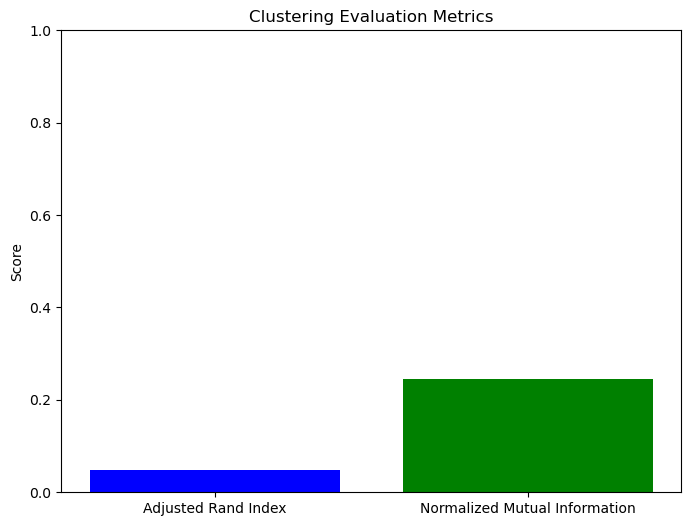

In [47]:
# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(['Adjusted Rand Index', 'Normalized Mutual Information'], [ari, nmi], color=['blue', 'green'])
plt.title('Clustering Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  
plt.show()

### Analysis
- The unsupervised methods of clustering was unsuccessful and did not represent the true labels well
- Number of features may be too large and complex
- Gut metagenomes may not be as representative of human health when attempting to identify specific conditions as we assumed at the beginning
- Further processing of the genome sequences themselves may reveal more insights. 

References:

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004977

https://www.kaggle.com/datasets/antaresnyc/metagenomics/data